# 필요 라이브러리 불러오기

## 라이브러리 불러오기 전
- pip install opencv-python 을 입력하여 설치하기

In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import cv2
from IPython.display import Image
from os import listdir as ld

# 필요 모델 들고오기 - VGG16

In [2]:
vgg_model = VGG16(weights='imagenet', include_top=False)

## 마지막 컨볼루션 레이어의 출력으로 새 모델 생성

In [3]:
# Create a new model with the output of the last convolutional layer
model = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer('block5_pool').output)

In [4]:
import tensorflow.keras.utils as utils
# import keras.utils as utils #이미지를 불러오기 위해 필요한 package

# 기준이 될 이미지 불러오기
- 첫 번째 이미지를 로드하고 VGG용으로 사전 처리

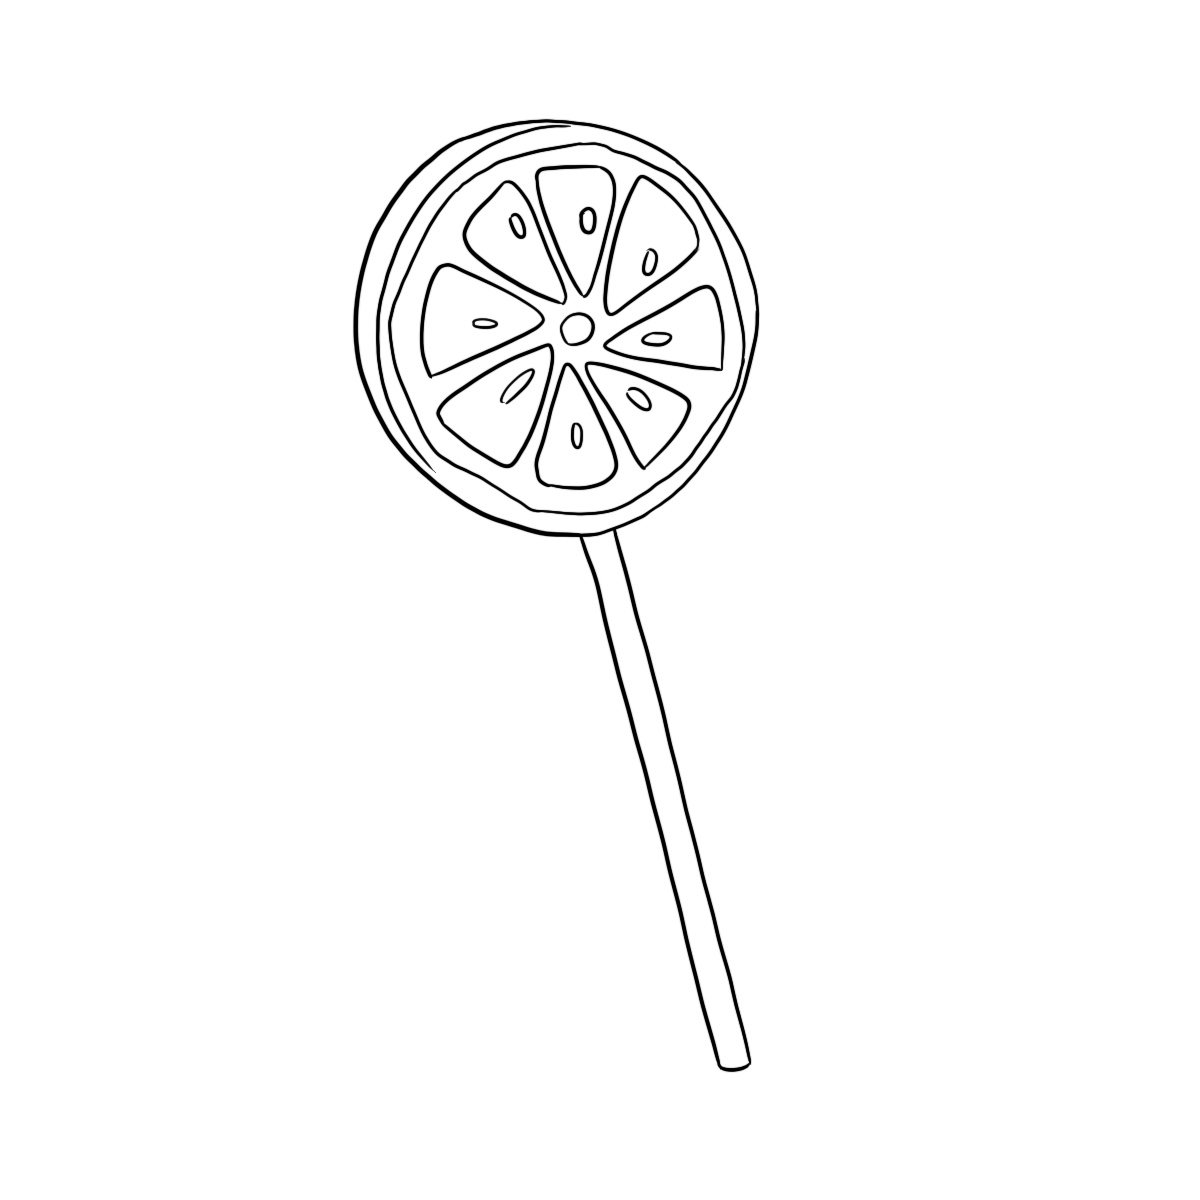

In [6]:
Image("D:\\k-digital\\source\\siamese\candy\\anchor\\s_0700_13607_187916.jpg")

In [7]:
# Load the first image and preprocess it for VGG
img1 = utils.load_img("D:\\k-digital\\source\\siamese\candy\\anchor\\s_0700_13607_187916.jpg", target_size=(224, 224))
img1 = utils.img_to_array(img1)
img1 = np.expand_dims(img1, axis=0)
img1 = preprocess_input(img1)

## 첫 번째 이미지에서 형상 추출

In [8]:
# Extract features from the first image
features1 = model.predict(img1)
features1 = features1.flatten()

# 비교 이미지(positive)불러오기

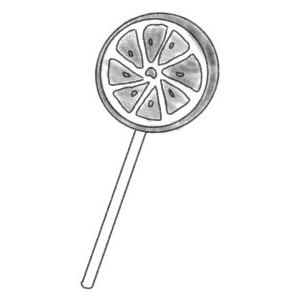

In [10]:
Image("D:\\k-digital\\source\\siamese\\candy\\positive\\0.png")

In [11]:
# Load the second image and preprocess it for VGG
img2 = utils.load_img("D:\\k-digital\\source\\siamese\\candy\\positive\\0.png", target_size=(224, 224))
img2 = utils.img_to_array(img2)
img2 = np.expand_dims(img2, axis=0)
img2 = preprocess_input(img2)

In [12]:
# Extract features from the second image
features2 = model.predict(img2)
features2 = features2.flatten()

In [13]:
# Calculate the cosine similarity between the two feature vectors
cosine_similarity = np.dot(features1, features2) / (np.linalg.norm(features1) * np.linalg.norm(features2))

## positive image cosine similarity

In [14]:
print("Cosine similarity: ", cosine_similarity)

Cosine similarity:  0.56833297


# 비교 이미지(negative) 불러오기

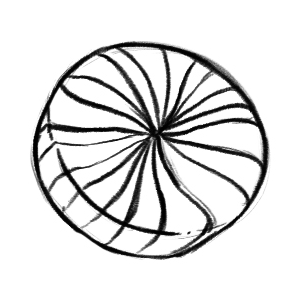

In [15]:
Image("D:\\k-digital\\source\\siamese\candy\\negative\\0.png")

In [16]:
# Load the second image and preprocess it for VGG
img2 = utils.load_img("D:\\k-digital\\source\\siamese\candy\\negative\\0.png", target_size=(224, 224))
img2 = utils.img_to_array(img2)
img2 = np.expand_dims(img2, axis=0)
img2 = preprocess_input(img2)

In [17]:
# Extract features from the second image
features2 = model.predict(img2)
features2 = features2.flatten()

In [18]:
# Calculate the cosine similarity between the two feature vectors
cosine_similarity = np.dot(features1, features2) / (np.linalg.norm(features1) * np.linalg.norm(features2))

## negative

In [19]:
print("Cosine similarity: ", cosine_similarity)

Cosine similarity:  0.22057661


# 함수

In [20]:
def cos_sim(list, mod='positive'):
    positive_sim=[]
    negative_sim=[]
    for i in (list):
        img2 = utils.load_img(i, target_size = (224, 224))
        img2 = utils.img_to_array(img2)
        img2 = np.expand_dims(img2, axis=0)
        img2 = preprocess_input(img2)
        features2 = model.predict(img2)
        features2 = features2.flatten()
        cos_similarity = np.dot(features1, features2) / (np.linalg.norm(features1) * np.linalg.norm(features2))
        if mod == 'positive':
            positive_sim.append(cos_similarity)
        elif mod == 'negative':
            negative_sim.append(cos_similarity)
        else:
            print('함수 잘못 사용함')
    if mod == 'positive':
        print('POSITIVE')
        posi_sim_df = pd.DataFrame(positive_sim)
        print('최대 유사도: %.2f, 최소 유사도: %.2f, 평균 유사도: %.2f, 중앙 유사도: %.2f' %(max(positive_sim), min(positive_sim),
                                                                   (sum(positive_sim)/len(positive_sim)), posi_sim_df.median()))
        posi_sim_df.to_csv('positive.csv')
        return posi_sim_df
    else:
        print('NEGATIVE')
        nega_sim_df = pd.DataFrame(negative_sim)
        print('최대 유사도: %.2f, 최소 유사도: %.2f, 평균 유사도: %.2f, 중앙 유사도: %.2f' %(max(negative_sim), min(negative_sim),
                                                                   (sum(negative_sim)/len(negative_sim)), nega_sim_df.median()))
        nega_sim_df.to_csv('negative.csv')
        return nega_sim_df

In [21]:
nega_dir = 'D:\\k-digital\\source\\siamese\\candy\\negative'
posi_dir = 'D:\\k-digital\\source\\siamese\\candy\\positive'

nega_list = [nega_dir+'\\'+f for f in(ld(nega_dir))]
posi_list = [posi_dir+'\\'+f for f in(ld(posi_dir))]

In [22]:
print(nega_list[0])
print(posi_list[0])

D:\k-digital\source\siamese\candy\negative\0.png
D:\k-digital\source\siamese\candy\positive\0.png


In [23]:
cos_sim(nega_list, 'negative')

NEGATIVE
최대 유사도: 0.61, 최소 유사도: 0.07, 평균 유사도: 0.24, 중앙 유사도: 0.23


,0
0,0.220577
1,0.194562
2,0.151596
3,0.207915
4,0.383536
...,...
7419,0.344290
7420,0.452443
7421,0.430844
7422,0.367659


In [24]:
cos_sim(posi_list)

POSITIVE
최대 유사도: 0.89, 최소 유사도: 0.10, 평균 유사도: 0.43, 중앙 유사도: 0.44


,0
0,0.568333
1,0.594054
2,0.555321
3,0.184608
4,0.108966
...,...
379,0.542577
380,0.837698
381,0.662684
382,0.708108


직접 그린 이미지

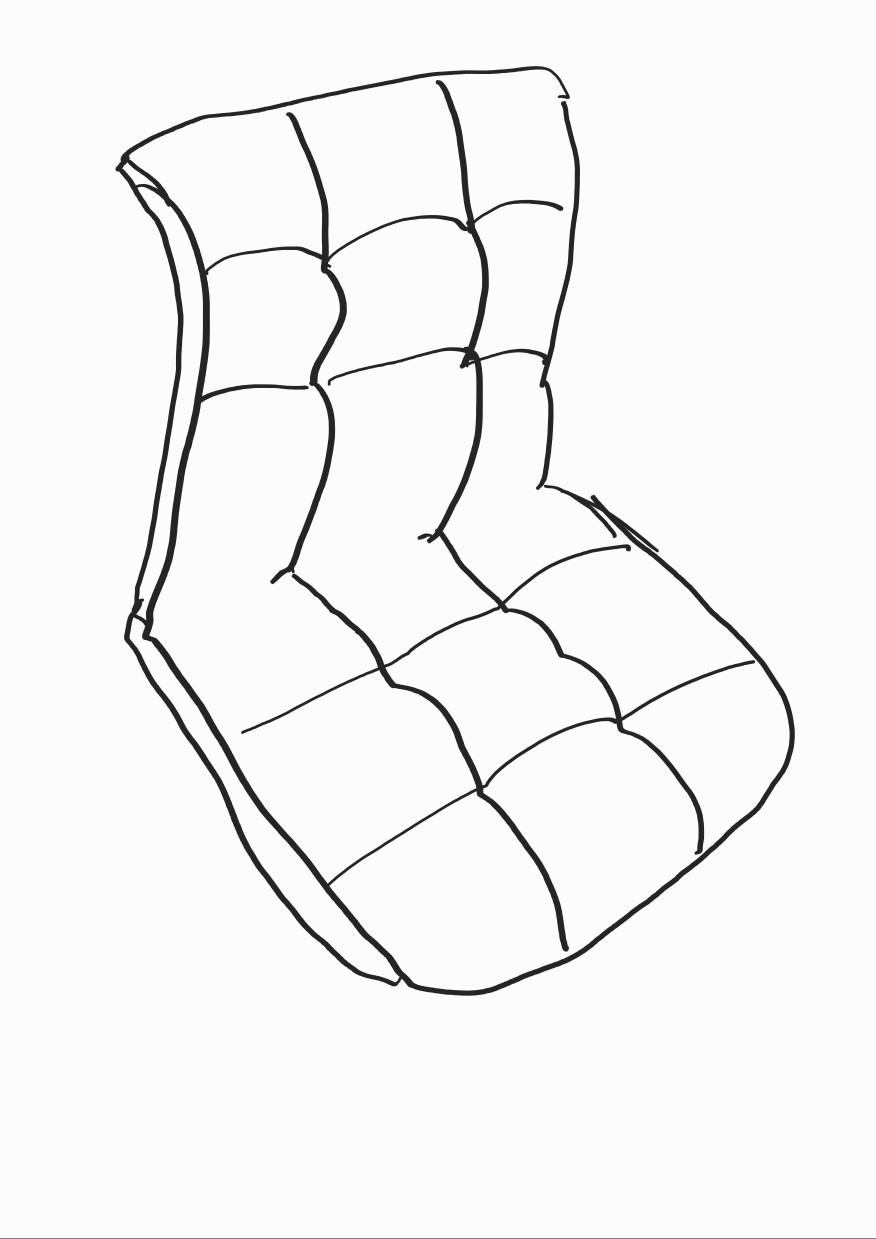

In [54]:
Image("D:\\k-digital\\source\\siamese\\chair\\test\\chair1.jpg")

In [60]:
img2 = utils.load_img("D:\\k-digital\\source\\siamese\\chair\\test\\chair1.jpg", target_size=(224, 224))
img2 = utils.img_to_array(img2)
img2 = np.expand_dims(img2, axis=0)
img2 = preprocess_input(img2)

In [61]:
features2 = model.predict(img2)
features2 = features2.flatten()

In [62]:
cosine_similarity = np.dot(features1, features2) / (np.linalg.norm(features1) * np.linalg.norm(features2))

In [63]:
print("Cosine similarity: ", cosine_similarity)

Cosine similarity:  0.43845537


In [64]:
p_df = pd.read_csv("D:\\k-digital\\source\\siamese\\chair\\positive.csv")
p_df.nunique()

Unnamed: 0    672
0             503
dtype: int64

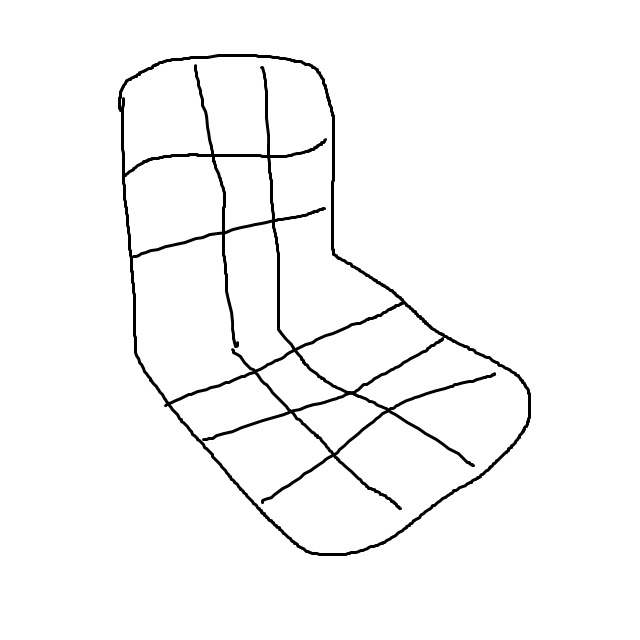

In [65]:
Image('D:\\k-digital\\source\\siamese\\chair\\test\\chair2.jpg')

In [66]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import numpy as np
import cv2
import tensorflow.keras.utils as utils

vgg_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer('block5_pool').output)

img1 = utils.load_img("D:\\k-digital\\source\\siamese\candy\\anchor\\s_0700_13607_187916.jpg", target_size=(224, 224))
img1 = utils.img_to_array(img1)
img1 = np.expand_dims(img1, axis=0)
img1 = preprocess_input(img1)
features1 = model.predict(img1)
features1 = features1.flatten()

img2 = utils.load_img("D:\\k-digital\\source\\siamese\\chair\\test\\chair2.jpg", target_size=(224, 224))
img2 = utils.img_to_array(img2)
img2 = np.expand_dims(img2, axis=0)
img2 = preprocess_input(img2)
features2 = model.predict(img2)
features2 = features2.flatten()
cosine_similarity = np.dot(features1, features2) / (np.linalg.norm(features1) * np.linalg.norm(features2))
print("Cosine similarity: ", cosine_similarity)

Cosine similarity:  0.58237207
